# Lab - 05 Multiple Linear Regression with the California Housing Dataset
**Larger real-world dataset** 
    **20,640 samples**, each with **eight numerical features**
	* Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297. Submitted to the StatLib Datasets Archive by Kelley Pace (kpace@unix1.sncc.lsu.edu). [9/Nov/99]. 
* Perform **multiple linear regression** using **all eight numerical features** 
    * Make **more sophisticated housing price predictions** than if we were to use only a **single feature** or a **subset of the features**
* **`LinearRegression`** estimator performs **multiple linear regression** by default

<hr style="height:2px; border:none; color:black; background-color:black;">

## Loading the Dataset
* The dataset has **20,640 samples**—**one per block group**—with **eight features** each:
	* **median income**—in tens of thousands, so 8.37 would represent $83,700
	* **median house age**—in the dataset, the maximum value for this feature is 52
	* **average number of rooms** 
	* **average number of bedrooms** 
	* **block population**
	* **average house occupancy**
	* **house block latitude**
	* **house block longitude**

* **Target** &mdash; **median house value** in hundreds of thousands, so 3.55 would represent \$355,000
    * **Maximum** for this feature is**&nbsp;5** for **\$500,000** 
* Reasonable to expect **more bedrooms**, **more rooms** or **higher income** would mean **higher house value**
* **Combine all numeric features to make predictions**
    * More likely to get **more accurate predictions** than with simple linear regression

### Q1. Load the Data 

* Use `sklearn.datasets` function **`fetch_california_housing`** 
*     Add `%matplotlib inline` to enable Matplotlib in this notebook.

In [2]:
%matplotlib inline


In [5]:
#Your code
from sklearn.datasets import fetch_california_housing


### Q2. Display the Dataset’s Description

In [6]:
#Your code
data=  fetch_california_housing(as_frame=True)

print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

### Q3. From the description above indentify and confirm number of **samples/features**, number of **targets**, and **feature names**

In [10]:
#Your code
#as before, len(data.target) will be the number of samples
print(len(data.target))

20640


In [11]:
#Your code
#Number of targets
print(len(data.target_names))

1


In [12]:
#Your code
print(data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [14]:
#Your code
#Why are there 4 cells for 3 questions?
#oh well, here's a joke
#How do you know Marty McFly is a Bears fan?
#He keeps going back to 1985

## Exploring the Data with a Pandas 

### Q4.1
* Import Pandas
* Set 4 digit precision for floats
* Load the dataset as a DataFrame
* Include an instruction to add a **`DataFrame` column** called "MedHouseValue" for **median house values**

In [2]:
import pandas as pd

In [11]:
#Your code
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
#Your code

In [13]:
#Your code

### Q4.2
* display the first few columns

In [14]:
#Your code

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


### Q4.3
* Calculate **`DataFrame`’s summary statistics**

In [15]:
#Your code

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


## Visualize the Features 
* Helpful to **visualize** data by **plotting the target value** against **each** feature
    Shows how **median home value** relates to **each feature**

### Q5.1
* To make our visualizations clearer, let’s use **`DataFrame` method **`sample`**** to **randomly select 10% of the 20,640 samples** for graphing

In [52]:
#Your code

### Q5.2
* Display **scatter plots** of several **features** Note: use for loop
* Each shows **feature** on **x-axis** and **median home value** on **y-axis**

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

In [20]:
sns.set_style('whitegrid')                                    

In [ ]:
#Your code

### Q5.3
* Document the interesting trends that you notice in these graphs.

* Some **interesting things** to notice in these graphs:
	* **Latitude and longitude graphs** each have **two areas** of especially significant density&mdash;**greater Los Angeles** and **greater San Francisco** areas where house prices tend to be higher
    * Each graph shows a **horizontal line of dots at the y-axis value 5**, which represents the [**maximum median house value \$500,000** listed in the 1990 census form](https://www.census.gov/prod/1/90dec/cph4/appdxe.pdf)
    * **`HouseAge` graph** shows a **vertical line of dots** at the **x-axis value 52**
        * **Highest home age** on the 1990 census form was **52**

<!-- ![California Housing Dataset scatterplot of Median House Value vs. Median Income](./ch14images/medincome.png "California Housing Dataset scatterplot of Median House Value vs. Median Income")
 ![California Housing Dataset scatterplot of Median House Value vs. House Age](./ch14images/houseage.png "California Housing Dataset scatterplot of Median House Value vs. House Age")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Rooms](./ch14images/averooms.png "California Housing Dataset scatterplot of Median House Value vs. Average Rooms")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Bedrooms](./ch14images/avebedrooms.png "California Housing Dataset scatterplot of Median House Value vs. Average Bedrooms")
 ![California Housing Dataset scatterplot of Median House Value vs. Population](./ch14images/population.png "California Housing Dataset scatterplot of Median House Value vs. Population")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Occupancy](./ch14images/aveoccupancy.png "California Housing Dataset scatterplot of Median House Value vs. Average Occupancy")
 ![California Housing Dataset scatterplot of Median House Value vs. Lattitude](./ch14images/lattitude.png "California Housing Dataset scatterplot of Median House Value vs. Lattitude")
 ![California Housing Dataset scatterplot of Median House Value vs. Longitude](./ch14images/longitude.png "California Housing Dataset scatterplot of Median House Value vs. Longitude")<hr style="height:2px; border:none; color:black; background-color:black;"> -->

## Q6 Split the Data for Training and Testing Using `train_test_split`  

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#Your code

In [24]:
X_train.shape

(15480, 8)

In [25]:
X_test.shape

(5160, 8)

## Train the Model 
* **`LinearRegression`** tries to use **all** features in a dataset’s `data` array
    * **error** if any features are **categorical**  
    * Categorical data must be preprocessed into numerical data or excluded
* **Scikit-learn’s bundled datasets** are already in the **correct format** for training

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
#Your code

In [28]:
#Your code

LinearRegression()

### Q7
* Perform Multiple Linear Regression that uses 8 numericla features to make housing price prediction than if we were using only a single feature. Note use for loop.
* scikit-learn will do most of the work for you - LinearRegression performs multiple linear regression by default.

In [54]:
#Your code  

### Q9 Record your observation

In [55]:
# Document Your answer

In [ ]:
* **Separate coefficients** for each feature (stored in `coeff_`) and **one intercept** (stored in `intercept_`) 

In [56]:
linear_regression.intercept_

-36.882950656055414

* Can use coefficient values in following equation to **make predictions**:

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}

* <em>m</em><sub>1</sub>, <em>m</em><sub>2</sub>, …, <em>m</em><sub><em>n</em></sub> are the **feature coefficients**
* <em>b</em> is the **intercept**
* <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub>, …, <em>x</em><sub><em>n</em></sub> are **feature values** (the **independent variables**)
* <em>y</em> is the **predicted value** (the **dependent variable**)
   

## Q10 Test the Model 
* Use the estimator’s `predict` method 
* Display first 5 predictions and first five targets(expected)

In [38]:
#Your code

In [39]:
#Your answer

In [40]:
#Your answer # first 5 predictions

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [41]:
#Your answer # first five targets 

array([0.762, 1.732, 1.125, 1.37 , 1.856])

* In **classification**, **predictions** were **distinct classes** that **matched existing classes** in the dataset
* In **regression**, it’s **tough to get exact predictions**, because you have **continuous outputs**
    * Every possible value of <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub> … <em>x</em><sub><em>n</em></sub> in the following calculation predicts a value

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}


##  Visualize the Expected vs. Predicted Prices 
### Q11.1 Create a `DataFrame` containing columns for the expected and predicted values:

In [42]:
#Your answer

In [43]:
#Your answer

In [44]:
#Your answer

### Q11.2 Visualize the Expected vs. Predicted Prices
* Plot the data as a scatter plot with the **expected (target) prices** along the x-axis and the **predicted prices** along the **y**-axis: 
* Set the **<em>x</em>**- and **<em>y</em>**-axes’ limits to use the same scale along both axes:
* Plot a line that represents **perfect predictions** (this is **not** a regression line). 
    * The call to **`plot`** displays a line between the points representing the lower-left corner of the graph (`start, start`) and the upper-right corner of the graph (`end, end`). 
    * The third argument (`'k--'`) indicates the line’s style. 
    * The letter `k` represents the color black, and the `--` indicates that plot should draw a dashed line: 
* If every predicted value were to match the expected value, then all the dots would be plotted along the dashed line. 

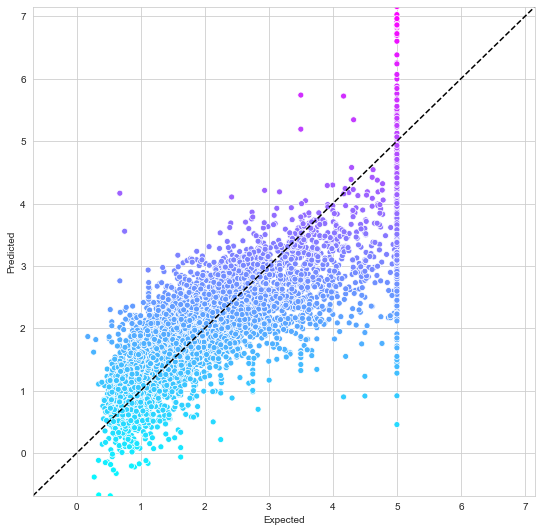

In [45]:
#Your answer

* Document your observation on your predictions
* Answer:
* Appears that as the expected median house value increases, more of the predicted values fall below the line. 
* So the model **seems to predict** lower median house values as the **expected** median house value increases. 


## Regression Model Metrics
### Q11.3 Compute the mtrics
* **Metrics for regression estimators** include **coefficient of determination** (**$R^{2}$ score**; 0.0-1.0)
    * **1.0** &mdash; estimator **perfectly predicts** the **dependent variable’s value**, given independent variables' values
    * **0.0** &mdash; **model cannot make predictions with any accuracy**, given independent variables’ values 
* Calculate **$R^{2}$ score** with arrays representing the **expected** and **predicted results**

In [46]:
from sklearn import metrics

In [47]:
#Your answer

0.6008983115964329

## Choosing the Best Model ** For Graduate Students
### Bonus points will be awarded for Undergraduate students attempting this part of the lab
* **Try several estimators** to determine whether any **produces better results** than `LinearRegression` 
* [Information about estimators used here](https://scikit-learn.org/stable/modules/linear_model.html)

In [48]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [49]:
#Your code

### Run the estimators using **k-fold cross-validation** 

In [50]:
from sklearn.model_selection import KFold, cross_val_score

In [51]:
#Your code

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


* Document your observation.
#Your answer

***End***